<a href="https://colab.research.google.com/github/MalikHasnat1999/Data-Analysis/blob/master/Feature_Eningeering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import linear_model

# Connect to Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
# choose the kaggle.json file that you downloaded
from google.colab import files
files.upload()

In [ ]:
# Run this cell if you can't find the kaggle folder
! mkdir ~/.kaggle/    # make a kaggle folder in root directory

In [ ]:
# copy kaggle.json file to the kaggle folder in the root directory
!cp kaggle.json ~/.kaggle/

In [ ]:
# Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# That's all ! You can check if everything's okay by running this command
!kaggle datasets list 

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Feature Engineering
Feature engineering is the process of using domain knowledge to extract features from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process. 50%-60% of entire data science project

1). EDA(Exploratory Data Analysis). It may include:
* Finding Numerical Features 
* Finding Categorical Features
* Cleaning 

2). Handling Missing Values
* Mean, Median and Mode

3). Handling Imbalance Data

4). Treating the Outliers

5). Feature Scaling
* Standardization and Normalization

6). Categorical Features to Numerical Features
* One-hot encode

## 1). EDA

In [ ]:
!kaggle competitions download -c titanic

In [ ]:
!unzip /content/titanic.zip

In [ ]:
train =  pd.read_csv("train.csv")

In [ ]:
train.head()

Missing Data

In [ ]:
train.isnull() 

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',data=train)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=train)

In [ ]:
sns.distplot(train['Age'].dropna(), kde=False, bins=40)
             

In [ ]:
sns.countplot(x='SibSp', data=train)

In [ ]:
train['Fare'].hist(bins=40)

## 2). Handling missing values

**Data Cleaning**

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers. However we can be smarter about this and check the average age by passenger class

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [ ]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

Let's go ahead and drop the Cabin colum and the row in Embarked that is NaN

In [ ]:
train.drop('Cabin', axis=1, inplace=True)

In [ ]:
train.head()

## 3). Treating the Outliers

In statistics, an outlier is a data point that **differs** significantly from other observations

### i). Using Percentile

In [ ]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

In [ ]:
!unzip /content/new-york-city-airbnb-open-data.zip

In [ ]:
df = pd.read_csv("/content/AB_NYC_2019.csv")
df.head()

In [ ]:
df.shape

In [ ]:
df.price.describe()

In [ ]:
min_threshold, max_threshold = df.price.quantile([0.001,0.999])
min_threshold, max_threshold

In [ ]:
# get data points that has value less then the min_threshold
df[df.price < min_threshold]

In [ ]:
len(df[df.price < min_threshold])

In [ ]:
# get data points that has value greater then the max_threshold
df[df.price > max_threshold]

In [ ]:
len(df[df.price > max_threshold])

In [ ]:
# get values without outliers
df = df[(df.price < max_threshold) & (df.price > min_threshold)]
df.shape

### ii). Using Standard Deviation



In [ ]:
! kaggle datasets download -d mustafaali96/weight-height

In [ ]:
! unzip /content/weight-height.zip

In [ ]:
df = pd.read_csv("/content/weight-height.csv")
df.head()

In [ ]:
df = df.drop("Weight",1)
df.head()

In [ ]:
df.describe()

In [ ]:
plt.hist(df.Height, bins=40)
plt.xlabel("Height")
plt.ylabel("count")

Histogram is a perfect **Bell Curve**

In [ ]:
# find mean
df.Height.mean()

In [ ]:
# find standard Deviation
df.Height.std()

we will use 3 standard deviation to remove the outliers (Standard)

>mean + 3*std

>mean - 3*std

In [ ]:
# Maximum Thershold
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

In [ ]:
# Minimum Threshold
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

In [ ]:
# check outliers
df[(df.Height > upper_limit) | (df.Height < lower_limit)]

In [ ]:
# removing the outliers
df = df[((df.Height < upper_limit) & (df.Height > lower_limit))]
df.shape

### iii). Using Z-score

z-score is a way to achieve same thing that we did in standard deviation.

z-score indicated how many standard deviation away a data point is/

>Z = (x - mean) / std

In [ ]:
! kaggle datasets download -d mustafaali96/weight-height

In [ ]:
! unzip /content/weight-height.zip

In [ ]:
df = pd.read_csv("/content/weight-height.csv")
df.head()

In [ ]:
df = df.drop("Weight", 1)
df.head()

In [ ]:
df["z_score"] = (df.Height - df.Height.mean()) / df.Height.std()
df.head()

Filter out those rows that has z-score greater than 3 standard deviation

In [ ]:
# Check outliers
df[(df.z_score < -3) | (df.z_score > 3)]

In [ ]:
# remove the outliers
df = df[(df.z_score > -3) & (df.z_score < 3)]
df.shape

### iv). Using IQR

In [ ]:
df = pd.read_csv("/content/weight-height.csv")
df.head()

In [ ]:
df = df.drop("Weight", 1)
df.head()

In [ ]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

In [ ]:
IQR = Q3 - Q1
IQR

Formula for lower and upper limit
> lower_limit = Q1 - 1.5*IQR

> upper_limit = Q3 + 1.5*IQR

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

In [ ]:
# check the outliers
df[(df.Height < lower_limit) | (df.Height > upper_limit)]

In [ ]:
# Remove the outliers
df = df[(df.Height > lower_limit) & (df.Height < upper_limit)]
df.shape

## 4). Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data.

In data processing, it is also known as data normalization and is generally performed during the data preprocessing step

### i). Standardization

Also known as z-score Normalization

#### *Using StandardScaler
> Xi` = (Xi - mean) / S.D


New series has characterstics:
* Mean = 0
* S.D = 1

Also known as **Mean Centring**

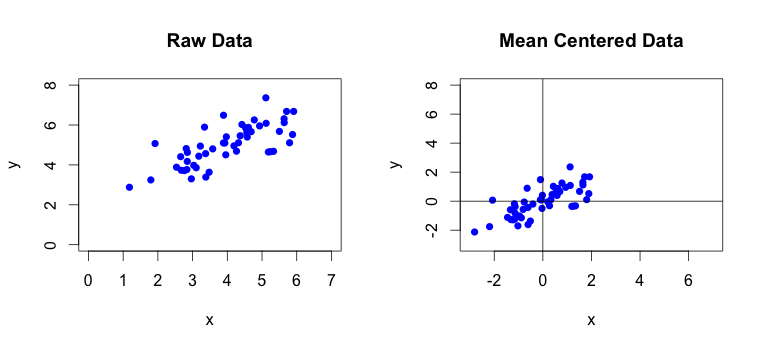



When to use:
* K-means (Distance between 2 samples)
* K-Nearest-Neighbour (Distance between 2 samples)
* PCA
* Artifical Neural Netwrok
* Gradient Descent



In [ ]:
! kaggle datasets download -d rakeshrau/social-network-ads

In [ ]:
!unzip /content/social-network-ads.zip

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

In [ ]:
df = df[["Age", "EstimatedSalary", "Purchased"]]
df.sample(5)

`train_test_split()` is recommended/important before standardization or normalization

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop("Purchased",1),
                                                    df.Purchased,
                                                    test_size=0.3,
                                                    random_state=42)
x_train.shape, x_test.shape

We will use scikit learn built-in function `StandardScaler` to perform standardization 

In [ ]:
from sklearn.preprocessing import StandardScaler

# make an object
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train) # fit implies calculating mean of the columns

# transform train and test sets
# we fit on the x_train but we will transform on both x_train and x_test
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
scaler.mean_

In [ ]:
# convert x_train_scaled and x_test_scaled to pandas DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [ ]:
x_train_scaled

In [ ]:
np.round(x_train.describe(),1)

In [ ]:
np.round(x_train_scaled.describe(),1)

 **Effect of Scaling** 

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,7))

ax1.scatter(x_train["Age"], x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Age"], x_train_scaled["EstimatedSalary"], color="red")
ax2.set_title("After Scaling")

### ii). Normalization

Normalization is a technique often applied as part of data prepration for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information

#### *Using MinMaxScaling

> Xi` = (Xi - Xmin) / (Xmax - Xmin)

* Distribution b/w [0, 1]

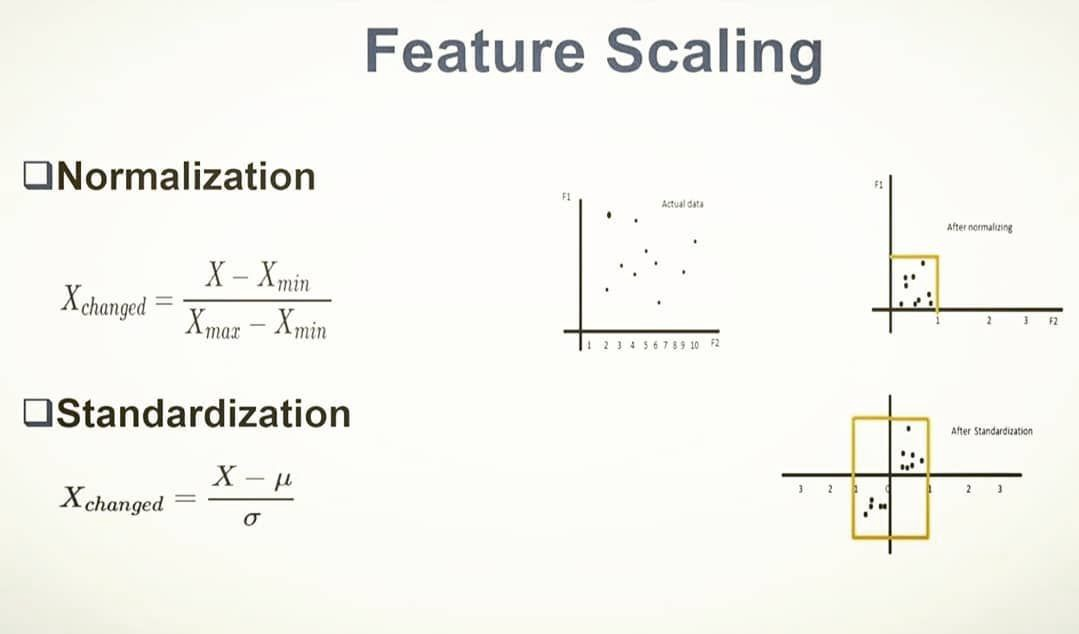


In [ ]:
! kaggle competitions download -c wine-m

In [ ]:
! unzip /content/wine-m.zip

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head(1)

In [ ]:
df = df[["id", "alcohol", "malic_acid"]]
df.head(3)

In [ ]:
# It is important to train_test_split() your data before Scaling it
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop("id",1),
                                                    df["id"],
                                                    test_size=0.1,
                                                    random_state=42)
x_train.shape, x_test.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the training set, it will learn the parameters
scaler.fit(x_test)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# convert x_traind_scaled & x_test_scaled to pandas DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [ ]:
# min=0 and max=1
np.round(x_train_scaled.describe())

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train["alcohol"], x_train["malic_acid"], c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["alcohol"], x_train_scaled["malic_acid"], c=y_train)
ax2.set_title("After Scaling")

#### *Using MaxAbsScaling

> Xi` = Xi / |Xmax|

* sklearn class
* Used when data is sparsed (having alot of 0's)

#### *Using Roboust Scaling

> Xi` = (Xi - Xmedian) / IQR

* sklearn class
* Roboust to outliers


### Normalization vs Standardization

First of all check...


Is feature scaling required?

is not required in case of Decision Tree

Mostly Standardization is used. Gives better results

Normalization is used with Images where values of pixel is known 0-255

## 5). Categorical Data

Two Types:
* Nominal (No Order)

e.g Names ali, Hasnat
* Ordinal (Order)

e.g Grags A, B, C, F

### i). Ordinal Data

#### Using OrdinalEncoding

In [ ]:
! git clone https://github.com/campusx-official/100-days-of-machine-learning.git

In [ ]:
df = pd.read_csv("/content/100-days-of-machine-learning/day26-ordinal-encoding/customer.csv")
df.head()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:2],
                                                    df.iloc[:,-1],
                                                    test_size=0.2,
                                                    random_state=42)
x_train.shape

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


oe = OrdinalEncoder(categories=[["A","B","C","F"]])
# fit the encoder to training set
oe.fit(x_train)

# transform train and test set
x_train_encoded = oe.transform(x_train)
x_test_encoded = oe.transform(x_test)